In [209]:
import numpy as np
import random as rand
from random import shuffle

In [99]:
diff = np.zeros(1000, dtype = int)
time = np.zeros(1000, dtype = int)
workers = np.zeros((10,4),dtype=int)


In [100]:
with open('input.txt','r') as file:
    lines = file.readlines()
    diff = np.array(lines[1].split(), dtype=int)
    time = np.array(lines[2].split(), dtype=float)
    workers = np.zeros((10,4),dtype=float)
    for i in range(10):
        workers[i] = np.array(lines[4+i].split(),dtype=float)

In [180]:
def res(a):
    time_w = np.zeros(10)
    for i in range(1000):
        time_w[a[i]] += time[i] * workers[a[i], diff[i]-1]
    return np.max(time_w)

In [267]:
def gen_seq():
    return [rand.randint(0,9) for i in range(1000)]

def cross(a, b):
    c = list()
    for i in range(1000):
        c.append((a[i]+b[i])%10)
    return c

def cross_opt(a, b):
    c = list()
    time_w = np.zeros(10)
    for i in range(1000):
        if time_w[a[i]] + time[i] * workers[a[i], diff[i]-1] < time_w[b[i]] + time[i] * workers[b[i], diff[i]-1]:
            c.append(a[i])
            time_w[a[i]] += time[i] * workers[a[i], diff[i]-1]
        else:
            c.append(b[i])
            time_w[b[i]] += time[i] * workers[b[i], diff[i]-1]
    return c

def mutation_rand(a):
    #n = rand.randint(1,10)
    for i in range(10):
        n1 = rand.randint(0,999)
        n2 = rand.randint(0,9)
        a[n1] = n2
    return a

def mutation_impr(a):
    time_w = np.zeros(10)
    mins = np.zeros(10)
    mins.fill(999.)
    ind = np.zeros(10, dtype = int)
    for i in range(1000):
        task = time[i] * workers[a[i], diff[i]-1]
        time_w[a[i]] += task
        if(task < mins[a[i]]):
            mins[a[i]] = task
            ind[a[i]] = i
    b = list(a)
    a[ind[np.argmax(time_w)]] = np.argmin(time_w)
    if res(b) > res(a):
        return a
    else:
        return b

In [382]:
initial = 100000
birth = 50000
death = 51000
epochs = 100
mutation_p = 0.2
best1 = list()
sol = list()
min_sc = 99999999

In [ ]:
for e in range(1):
    population = list()
    for i in range(initial):
        population.append(gen_seq())
    for i in range(epochs):
        scores = list()
        for j in range(birth):
            n1 = rand.randint(0,len(population)-1)
            n2 = rand.randint(0,len(population)-1)
            population.append(cross_opt(population[n1], population[n2]))
        nm = int(mutation_p*len(population))
        
        #for j in range(nm):
            #jj = rand.randint(0,len(population)-1)
            #population[jj] = mutation_impr(population[jj])
       
        for j in range(len(population)):
            scores.append(res(population[j]))
        if np.min(scores) < min_sc:
            sol = list(population[np.argmin(scores)])
            min_sc = np.min(scores)
            #print('Exp: [{}], Epoch: [{}/{}], Worst_val: [{}], Best_val: [{}], Score: [{}]'.format(e+1,i+1,epochs,np.max(scores),np.min(scores),1e6/np.min(scores)))
        print('Epoch: [{}/{}], Worst_val: [{}], Best_val: [{}], Score: [{}]'.format(i+1,epochs,np.max(scores),np.min(scores),1e6/np.min(scores)))
        for j in range(death):
            n1 = rand.randint(0,len(population)-1)
            n2 = rand.randint(0,len(population)-1)
            n = n1
            if scores[n1] < scores[n2]:
                n = n2
            #n = np.argmax(scores)
            population.pop(n)
            scores.pop(n)
        for j in range(nm):
            jj = rand.randint(0,len(population)-1)
            population[jj] = mutation_rand(population[jj])
        #mutation_p -= 5e-3
    best1.append(population[0])
    print('Epoch {} finished'.format(e+1))
    

Epoch: [1/100], Worst_val: [1142.175], Best_val: [599.685], Score: [1667.5421262829655]
Epoch: [2/100], Worst_val: [1141.93], Best_val: [597.39], Score: [1673.9483419541673]
Epoch: [3/100], Worst_val: [1141.44], Best_val: [596.7700000000004], Score: [1675.68745077668]
Epoch: [4/100], Worst_val: [1141.44], Best_val: [594.15], Score: [1683.0766641420516]
Epoch: [5/100], Worst_val: [1113.5400000000002], Best_val: [591.5850000000003], Score: [1690.3741643212718]
Epoch: [6/100], Worst_val: [1113.5400000000002], Best_val: [591.145], Score: [1691.632340627088]
Epoch: [7/100], Worst_val: [1069.6450000000004], Best_val: [590.1550000000003], Score: [1694.4700968389652]
Epoch: [8/100], Worst_val: [1069.1050000000005], Best_val: [589.0499999999997], Score: [1697.6487564722868]
Epoch: [9/100], Worst_val: [1069.1050000000005], Best_val: [587.6350000000003], Score: [1701.7366222229775]
Epoch: [10/100], Worst_val: [958.7249999999998], Best_val: [586.595], Score: [1704.7537057083678]
Epoch: [11/100], W

In [365]:
score = 1e6/res(sol)
save = sol
for i in range(1000):
    sol = mutation_impr(sol)
    t = res(sol)
    if(1000000./t>score):
        score = 1000000./t
        save = sol
        print(score)

In [362]:
with open('output.txt', 'w') as file:
    for i in range(1000):
        file.write(str(sol[i]+1)  + ' ')

In [363]:
res(sol)

570.925

In [262]:
score = 0
save = list()
all = list()
for i in range(10000):
    l = gen_seq()
    t = res(l)
    all.append(t)
    if(1000000./t>score):
        score = 1000000./t
        save = l
        print(score)

1212.4077812331404
1386.0590183930024
1414.5071856965042
1485.144838750399
1493.529284375444
1494.9694278751992
1505.4912794417644


(array([ 184., 1168., 2786., 2740., 1740.,  904.,  336.,  101.,   35.,
           6.]),
 array([ 664.235,  703.948,  743.661,  783.374,  823.087,  862.8  ,
         902.513,  942.226,  981.939, 1021.652, 1061.365]),
 <BarContainer object of 10 artists>)

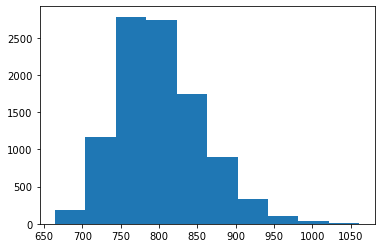

In [263]:
plt.hist(all)

In [260]:
counts

array([1.040e+02, 5.364e+03, 4.017e+03, 4.850e+02, 2.800e+01, 2.000e+00])